# python爬虫之beautifulsoup

今天要学习beatutifulsoup，并使用beautifulsoup提取丁香园论坛的回复内容。

Beautiful Soup 是一个可以从HTML或XML文件中提取数据的Python库.它能够通过你喜欢的转换器实现惯用的文档导航,查找,修改文档的方式.Beautiful Soup会帮你节省数小时甚至数天的工作时间.

Beautiful Soup将复杂HTML文档转换成一个复杂的树形结构,每个节点都是Python对象,所有对象可以归纳为4种: `Tag` , `NavigableString` , `BeautifulSoup` , `Comment` .

下面以爬取丁香园论坛的回复为例，来介绍beautifulsoup的用法

首先打开目标网站：

http://www.dxy.cn/bbs/thread/626626#626626

通过分析网页发现，回复内容在以`<td class="postbody">`开头的代码下面：

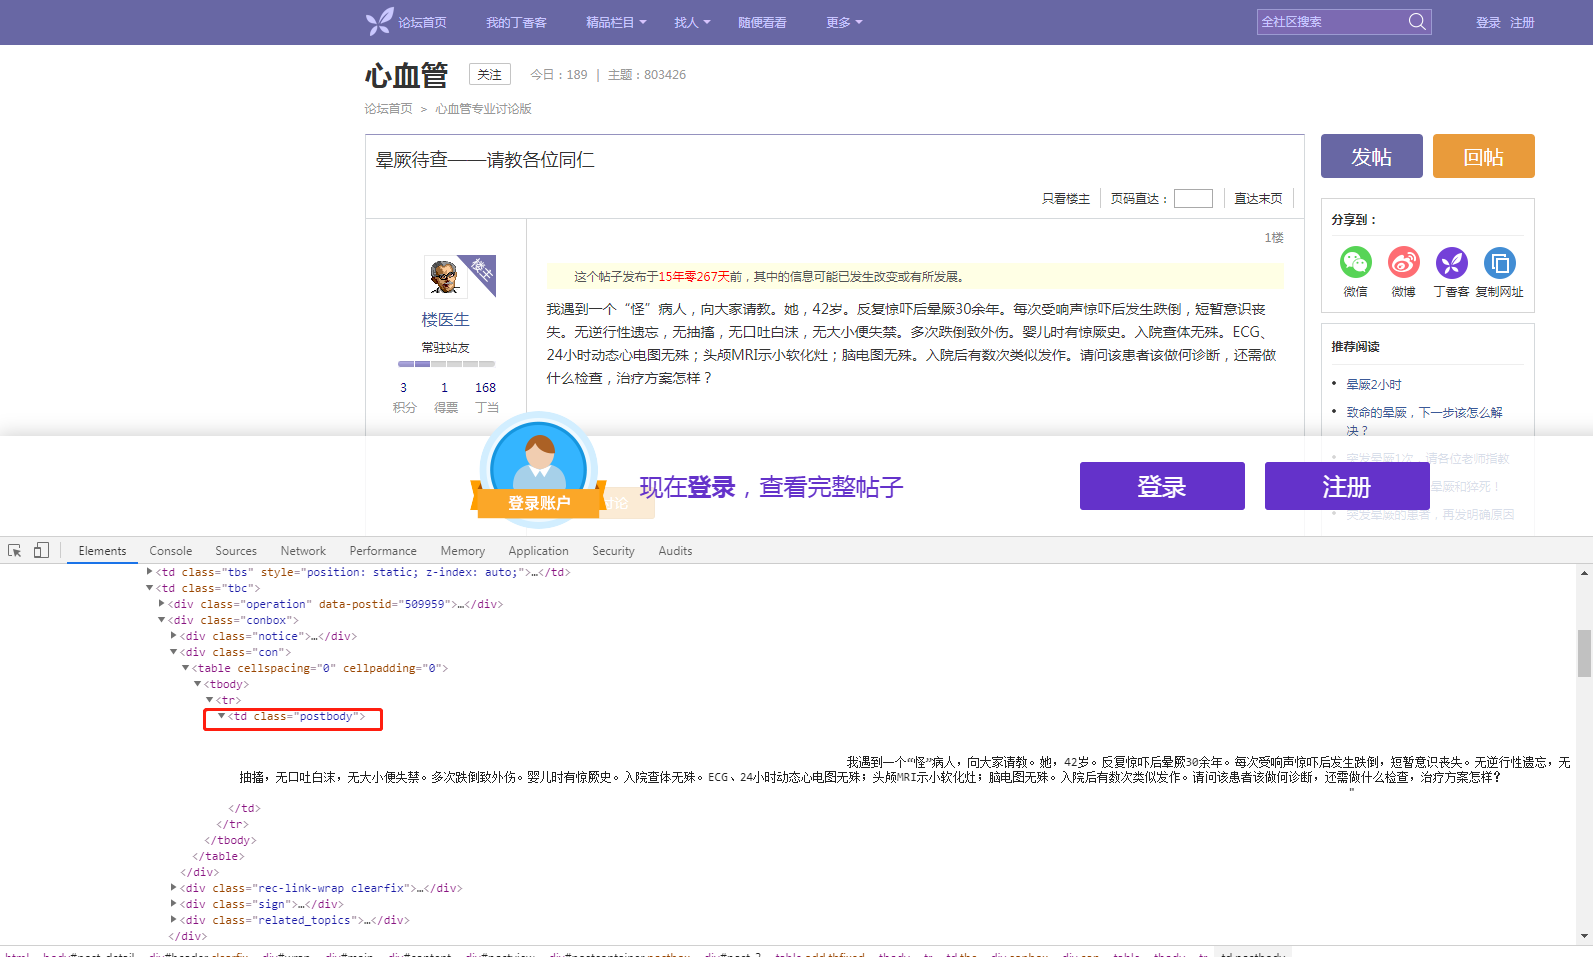

用户昵称在以`<div class="auth">`开头的结构下：

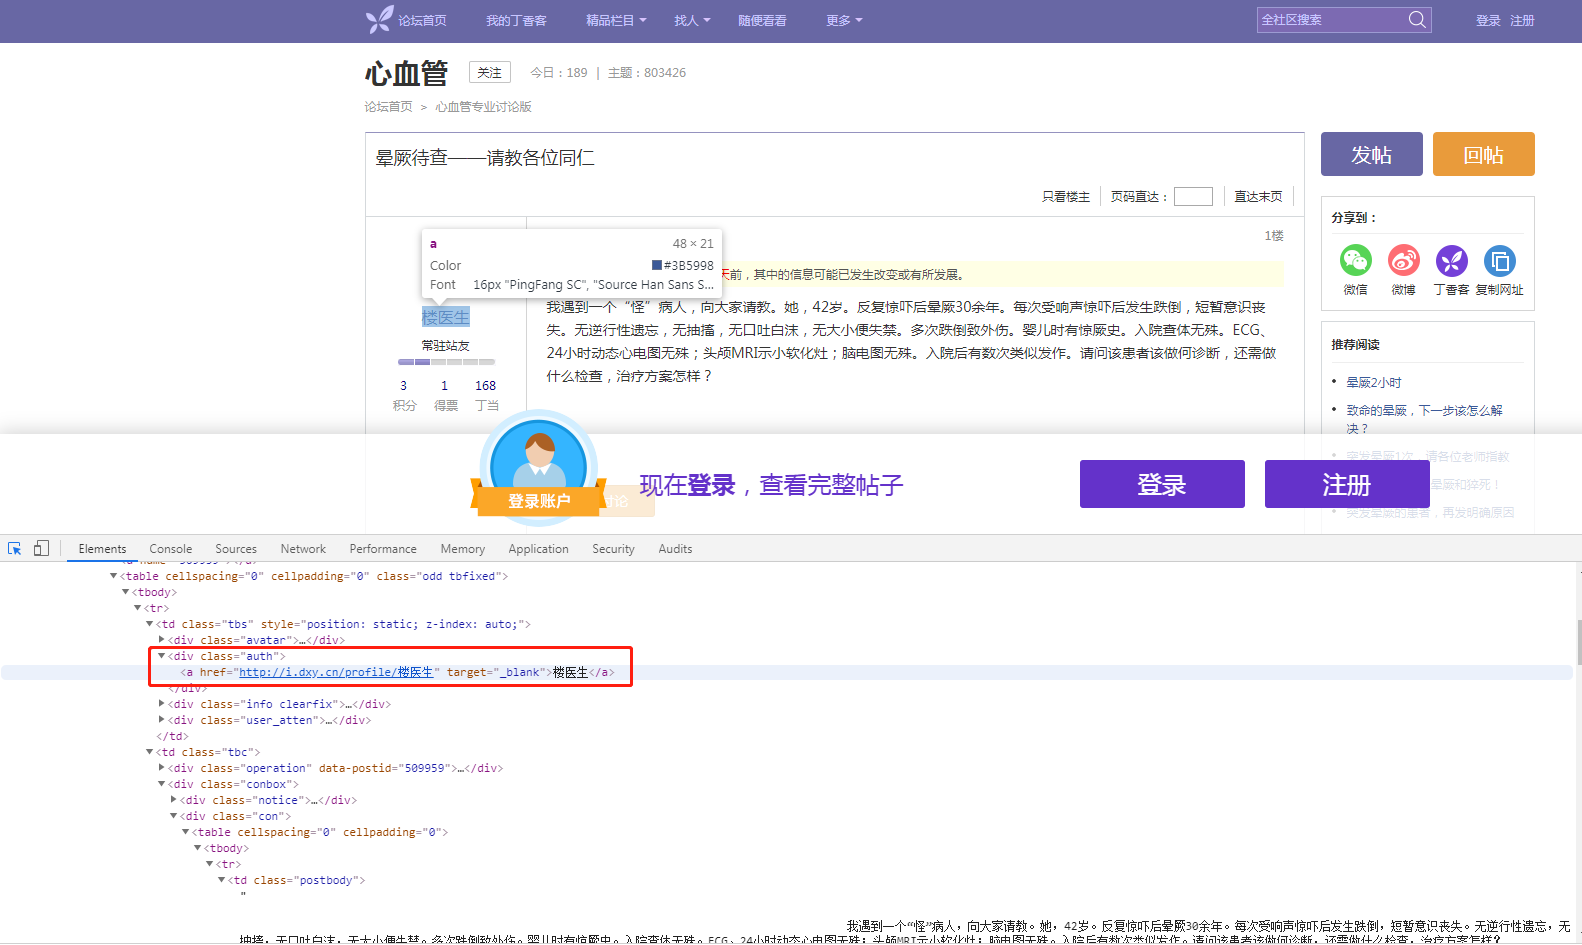

In [2]:
## 首先，读取网页
import requests

url = "http://www.dxy.cn/bbs/thread/626626#626626"
r = requests.get(url)

#如果发送了一个错误请求(一个 4XX 客户端错误，或者 5XX 服务器错误响应)，我们可以通过 Response.raise_for_status() 来抛出异常
r.raise_for_status()

html = r.text

上面获得的html包含了所有的网页代码，现在我们需要提取出我们需要的回复内容，我们需要对网页进行解析。下面采用beautifulsoup来解析文档

1.用文档创建Beautifulsoup对象。

BeautifulSoup 第一个参数应该是要被解析的文档字符串或是文件句柄,第二个参数用来标识怎样解析文档.如果第二个参数为空,那么Beautiful Soup根据当前系统安装的库自动选择解析器，否则，按照指定的解析器来解析文档。

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html,'html.parser')


1.读取用户的昵称数据，并保存

这里我们使用find_all，和find函数。

**`find`函数用法**：

`find(name, attrs, recursive, text, **wargs)`　　　　# recursive递归的，循环的

这些参数相当于过滤器一样可以进行筛选处理。不同的参数过滤可以应用到以下情况：

查找标签，基于`name`参数

查找文本，基于`text`参数

基于正则表达式的查找

查找标签的属性，基于attrs参数

基于函数的查找

**`find_all`用法：**

`find_all()`方法搜索当前tag的所有tag子节点,并判断是否符合过滤器的条件.

`find_all( name , attrs , recursive , string , **kwargs )`

`name` 参数可以查找所有名字为 `name` 的`tag`,字符串对象会被自动忽略掉

`keyword` 参数如果一个指定名字的参数不是搜索内置的参数名,搜索时会把该参数当作指定名字tag的属性来搜索,如果包含一个名字为 `id` 的参数,`Beautiful Soup`会搜索每个`tag`的”id”属性.


In [4]:
auths = soup.findAll('div',attrs={'class':'auth'})
for auth in auths:
    print(auth.string)

楼医生
lion000
xghrh
keys


2.读取查找回复内容


In [9]:
tds = soup.findAll('td',attrs={'class':'postbody'})
for td in tds:
    print(td.get_text(strip=True))

我遇到一个“怪”病人，向大家请教。她，42岁。反复惊吓后晕厥30余年。每次受响声惊吓后发生跌倒，短暂意识丧失。无逆行性遗忘，无抽搐，无口吐白沫，无大小便失禁。多次跌倒致外伤。婴儿时有惊厥史。入院查体无殊。ECG、24小时动态心电图无殊；头颅MRI示小软化灶；脑电图无殊。入院后有数次类似发作。请问该患者该做何诊断，还需做什么检查，治疗方案怎样？
从发作的症状上比较符合血管迷走神经性晕厥，直立倾斜试验能协助诊断。在行直立倾斜实验前应该做常规的体格检查、ECG、UCG、holter和X-ray胸片除外器质性心脏病。贴一篇“口服氨酰心安和依那普利治疗血管迷走性晕厥的疗效观察”作者：林文华 任自文 丁燕生http://www.ccheart.com.cn/ccheart_site/Templates/jieru/200011/1-1.htm
同意lion000版主的观点：如果此患者随着年龄的增长，其发作频率逐渐减少且更加支持，不知此患者有无这一特点。入院后的HOLTER及血压监测对此患者只能是一种安慰性的检查，因在这些检查过程中患者发病的机会不是太大，当然不排除正好发作的情况。对此患者应常规作直立倾斜试验，如果没有诱发出，再考虑有无可能是其他原因所致的意识障碍，如室性心动过速等，但这需要电生理尤其是心腔内电生理的检查，毕竟是有一种创伤性方法。因在外地，下面一篇文章可能对您有助，请您自己查找一下。心理应激事件诱发血管迷走性晕厥1例 ，杨峻青、吴沃栋、张瑞云，中国神经精神疾病杂志， 2002 Vol.28 No.2
该例不排除精神因素导致的，因为每次均在受惊吓后出现。当然，在作出此诊断前，应完善相关检查，如头颅MIR(MRA),直立倾斜试验等。


In [11]:
# 完整代码如下：
from bs4 import BeautifulSoup
import requests

url = 'http://www.dxy.cn/bbs/thread/626626#626626'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html,'html.parser')
#print(soup.title)
for data in soup.find_all('tbody'):
    try:
        username = data.find('div',class_= 'auth').get_text(strip=True)
        content = data.find('td',class_='postbody').get_text(strip=True)
        print(username+':'+content)
        print('************************')
    except:
        pass

楼医生:我遇到一个“怪”病人，向大家请教。她，42岁。反复惊吓后晕厥30余年。每次受响声惊吓后发生跌倒，短暂意识丧失。无逆行性遗忘，无抽搐，无口吐白沫，无大小便失禁。多次跌倒致外伤。婴儿时有惊厥史。入院查体无殊。ECG、24小时动态心电图无殊；头颅MRI示小软化灶；脑电图无殊。入院后有数次类似发作。请问该患者该做何诊断，还需做什么检查，治疗方案怎样？
************************
lion000:从发作的症状上比较符合血管迷走神经性晕厥，直立倾斜试验能协助诊断。在行直立倾斜实验前应该做常规的体格检查、ECG、UCG、holter和X-ray胸片除外器质性心脏病。贴一篇“口服氨酰心安和依那普利治疗血管迷走性晕厥的疗效观察”作者：林文华 任自文 丁燕生http://www.ccheart.com.cn/ccheart_site/Templates/jieru/200011/1-1.htm
************************
xghrh:同意lion000版主的观点：如果此患者随着年龄的增长，其发作频率逐渐减少且更加支持，不知此患者有无这一特点。入院后的HOLTER及血压监测对此患者只能是一种安慰性的检查，因在这些检查过程中患者发病的机会不是太大，当然不排除正好发作的情况。对此患者应常规作直立倾斜试验，如果没有诱发出，再考虑有无可能是其他原因所致的意识障碍，如室性心动过速等，但这需要电生理尤其是心腔内电生理的检查，毕竟是有一种创伤性方法。因在外地，下面一篇文章可能对您有助，请您自己查找一下。心理应激事件诱发血管迷走性晕厥1例 ，杨峻青、吴沃栋、张瑞云，中国神经精神疾病杂志， 2002 Vol.28 No.2
************************
keys:该例不排除精神因素导致的，因为每次均在受惊吓后出现。当然，在作出此诊断前，应完善相关检查，如头颅MIR(MRA),直立倾斜试验等。
************************


## Xpath

1. 学习xpath，使用lxml+xpath提取内容。

2. 使用xpath提取丁香园论坛的回复内容。

XPath 是一门在 XML 文档中查找信息的语言。XPath 可用来在 XML 文档中对元素和属性进行遍历。

XPath 是 W3C XSLT 标准的主要元素，并且 XQuery 和 XPointer 都构建于 XPath 表达之上。

在 XPath 中，有七种类型的节点：元素、属性、文本、命名空间、处理指令、注释以及文档节点（或称为根节点）。XML 文档是被作为节点树来对待的。树的根被称为文档节点或者根节点。

XPath 使用路径表达式来选取 XML 文档中的节点或节点集。节点是通过沿着路径 (path) 或者步 (steps) 来选取的。


In [13]:
# 安装xpath
pip install lxml

In [14]:
# 导入
from lxml import etree

In [16]:
## 首先，读取网页
import requests

url = "http://www.dxy.cn/bbs/thread/626626#626626"
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
}
r = requests.get(url,headers=headers)

#如果发送了一个错误请求(一个 4XX 客户端错误，或者 5XX 服务器错误响应)，我们可以通过 Response.raise_for_status() 来抛出异常
r.raise_for_status()

html = r.text

In [23]:
# 使用xpath
tree = etree.HTML(html)
username = tree.xpath('//div[@class="auth"]/a/text()')
print(username)

['楼医生', 'lion000', 'xghrh', 'keys']


In [26]:
content = tree.xpath('//td[@class="postbody"]')
for item in content:
    print(item.xpath('string(.)').strip())

我遇到一个“怪”病人，向大家请教。她，42岁。反复惊吓后晕厥30余年。每次受响声惊吓后发生跌倒，短暂意识丧失。无逆行性遗忘，无抽搐，无口吐白沫，无大小便失禁。多次跌倒致外伤。婴儿时有惊厥史。入院查体无殊。ECG、24小时动态心电图无殊；头颅MRI示小软化灶；脑电图无殊。入院后有数次类似发作。请问该患者该做何诊断，还需做什么检查，治疗方案怎样？
从发作的症状上比较符合血管迷走神经性晕厥，直立倾斜试验能协助诊断。在行直立倾斜实验前应该做常规的体格检查、ECG、UCG、holter和X-ray胸片除外器质性心脏病。贴一篇“口服氨酰心安和依那普利治疗血管迷走性晕厥的疗效观察”作者：林文华 任自文 丁燕生http://www.ccheart.com.cn/ccheart_site/Templates/jieru/200011/1-1.htm
同意lion000版主的观点：如果此患者随着年龄的增长，其发作频率逐渐减少且更加支持，不知此患者有无这一特点。入院后的HOLTER及血压监测对此患者只能是一种安慰性的检查，因在这些检查过程中患者发病的机会不是太大，当然不排除正好发作的情况。对此患者应常规作直立倾斜试验，如果没有诱发出，再考虑有无可能是其他原因所致的意识障碍，如室性心动过速等，但这需要电生理尤其是心腔内电生理的检查，毕竟是有一种创伤性方法。因在外地，下面一篇文章可能对您有助，请您自己查找一下。心理应激事件诱发血管迷走性晕厥1例 ，杨峻青、吴沃栋、张瑞云，中国神经精神疾病杂志， 2002 Vol.28 No.2
该例不排除精神因素导致的，因为每次均在受惊吓后出现。当然，在作出此诊断前，应完善相关检查，如头颅MIR(MRA),直立倾斜试验等。


In [29]:
#完整代码如下：

import requests
from lxml import etree
url = "http://www.dxy.cn/bbs/thread/626626#626626"
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
}
r = requests.get(url,headers=headers)

#如果发送了一个错误请求(一个 4XX 客户端错误，或者 5XX 服务器错误响应)，我们可以通过 Response.raise_for_status() 来抛出异常
r.raise_for_status()

html = r.text

# 使用xpath
tree = etree.HTML(html)
username = tree.xpath('//div[@class="auth"]/a/text()')
content = tree.xpath('//td[@class="postbody"]')

for i in range(len(username)):
    print(username[i].strip() + ' : '+ content[i].xpath('string(.)').strip())
    print('--------------------------------------------------')
    


楼医生 : 我遇到一个“怪”病人，向大家请教。她，42岁。反复惊吓后晕厥30余年。每次受响声惊吓后发生跌倒，短暂意识丧失。无逆行性遗忘，无抽搐，无口吐白沫，无大小便失禁。多次跌倒致外伤。婴儿时有惊厥史。入院查体无殊。ECG、24小时动态心电图无殊；头颅MRI示小软化灶；脑电图无殊。入院后有数次类似发作。请问该患者该做何诊断，还需做什么检查，治疗方案怎样？
--------------------------------------------------
lion000 : 从发作的症状上比较符合血管迷走神经性晕厥，直立倾斜试验能协助诊断。在行直立倾斜实验前应该做常规的体格检查、ECG、UCG、holter和X-ray胸片除外器质性心脏病。贴一篇“口服氨酰心安和依那普利治疗血管迷走性晕厥的疗效观察”作者：林文华 任自文 丁燕生http://www.ccheart.com.cn/ccheart_site/Templates/jieru/200011/1-1.htm
--------------------------------------------------
xghrh : 同意lion000版主的观点：如果此患者随着年龄的增长，其发作频率逐渐减少且更加支持，不知此患者有无这一特点。入院后的HOLTER及血压监测对此患者只能是一种安慰性的检查，因在这些检查过程中患者发病的机会不是太大，当然不排除正好发作的情况。对此患者应常规作直立倾斜试验，如果没有诱发出，再考虑有无可能是其他原因所致的意识障碍，如室性心动过速等，但这需要电生理尤其是心腔内电生理的检查，毕竟是有一种创伤性方法。因在外地，下面一篇文章可能对您有助，请您自己查找一下。心理应激事件诱发血管迷走性晕厥1例 ，杨峻青、吴沃栋、张瑞云，中国神经精神疾病杂志， 2002 Vol.28 No.2
--------------------------------------------------
keys : 该例不排除精神因素导致的，因为每次均在受惊吓后出现。当然，在作出此诊断前，应完善相关检查，如头颅MIR(MRA),直立倾斜试验等。
--------------------------------------------------
